In [23]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset , DataLoader
import torch .nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt


In [24]:
torch.manual_seed(42)

In [25]:
df=pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


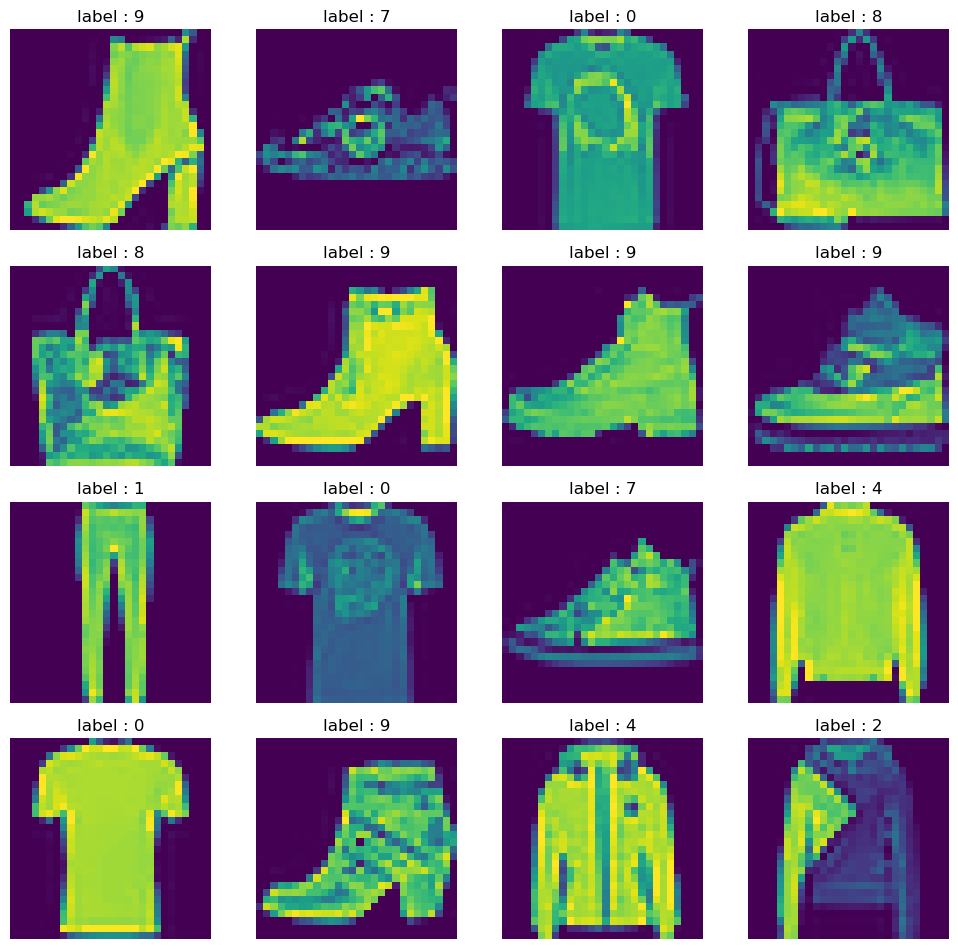

In [26]:
fig,axes=plt.subplots(4,4, figsize=(10,10))

for i,ax in enumerate(axes.flat):
    img=df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)

    ax.axis('off')

    ax.set_title(f'label : {df.iloc[i,0]}')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [27]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
# scaling

x_train=x_train/255.0
x_test=x_test/255.0

In [30]:
# create CustomDataset Class




class CustomDataset(Dataset):            # Dataset = PyTorch base class for datasets 👉                                         PyTorch-ന്റെ dataset base class

                                          # In your CustomDataset, Dataset is used to declare that the class follows the PyTorch dataset interface (providing __len__ and __getitem__) so that PyTorch tools like DataLoader can treat it as a standard dataset and safely iterate and batch samples from it.

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]


 
# __init__: stores and prepares the dataset data (features and labels) inside the object

# __len__: returns the number of samples in the dataset

# __getitem__: retrieves a single sample (feature, label) by index

# These three methods together allow PyTorch’s DataLoader to iterate over the dataset and create training batches.


In [31]:
train_dataset=CustomDataset(x_train,y_train)

In [32]:
# create test data object

test_dataset=CustomDataset(x_test,y_test)

In [33]:
# create train and test loder

train_loader=DataLoader(train_dataset,shuffle=True,batch_size=32)
test_loader=DataLoader(test_dataset,shuffle=False,batch_size=32)


In [34]:
# define NN class

class myNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()                      #  super() = call parent class methods
        self.model=nn.Sequential(
          
            nn.Linear(num_features,128),

            nn.BatchNorm1d(128),

            
            nn.ReLU(),

            nn.Dropout(.3),

            nn.Linear(128,64),

            nn.BatchNorm1d(64),
            nn.ReLU(),

            nn.Dropout(.3),
            nn.Linear(64,10),

            # In PyTorch, Softmax is not applied in the final layer when using CrossEntropyLoss because CrossEntropyLoss internally performs LogSoftmax followed by negative log likelihood. Therefore the model should output raw logits.


            #  nn.Softmax() not needed
        )
    def forward(sel,x):

        return sel.model(x)

# Because nn.Module’s constructor initializes internal structures that register submodules and parameters. Without calling it, layers defined in the child class are not properly tracked by PyTorch.

# 👉 Without super(), the class is still a child class, but the parent class initialization is not executed.
# 👉 With super(), the parent class properties and setup are properly added to the child object.

In [35]:
# swet lr , epochs
epochs=15
lr=.01

In [36]:
x_train.shape[1]

784

In [37]:
# initiate the model

model=myNN(x_train.shape[1])

# loss function

criterion=nn.CrossEntropyLoss()

# optimizer

optimizer=optim.SGD(model.parameters(),lr=lr,weight_decay=1e-4)

In [38]:
# training loop

for epoch in range(epochs):

    total_epoch_loss=0

    for fetures,labels in train_loader: # tran loader il ninn separate akki

        output=model(fetures)

    # loss calculating
    
        loss=criterion(output,labels)
        
    # backward pass

        optimizer.zero_grad()
        loss.backward()

    # update grad
        optimizer.step()


        total_epoch_loss=total_epoch_loss+loss.item()

    avg_loss=total_epoch_loss/len(train_loader)

    print(f'Epoch: {epoch+1} loss: {avg_loss}')



Epoch: 1 loss: 1.5089164876937866
Epoch: 2 loss: 1.0451052514712016
Epoch: 3 loss: 0.8846052074432373
Epoch: 4 loss: 0.7872317725419998
Epoch: 5 loss: 0.712337625225385
Epoch: 6 loss: 0.6690645875533422
Epoch: 7 loss: 0.6322767802079519
Epoch: 8 loss: 0.608903378645579
Epoch: 9 loss: 0.5810050557057063
Epoch: 10 loss: 0.5628006422519684
Epoch: 11 loss: 0.5356987694899241
Epoch: 12 loss: 0.5115607272585233
Epoch: 13 loss: 0.5139585261543592
Epoch: 14 loss: 0.4861059559384982
Epoch: 15 loss: 0.4789315989613533


In [39]:
# set model to evaluate mode

model.eval()

# model have to defferent behaviour duaring traing and predit
# Drop out - in only train , batch normalization , epoch

myNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [40]:
len(test_loader)

38

In [41]:
total=0
correct=0


with torch.no_grad():                  #👉 no backprop
#                                     👉 no gradients needed
#                                    👉 faster
#                                  👉 less memory
                                  # evaluation സമയത്ത് gradient വേണ്ട → disable



    for batch_fetures ,batch_labels in test_loader:

        output=model(batch_fetures)

        

        
        
        _,predicted=torch.max(output,1)

       

        total=total+batch_labels.shape[0]  # oru batch 32 undavum ,tottal etra rows calculate cheythu n ariyam

        correct=correct+(predicted==batch_labels).sum()

print('accuracy in test data',(correct/total).item())









accuracy in test data 0.82833331823349


In [42]:
# train data accuracy
total=0
correct=0


with torch.no_grad():                  #👉 no backprop
#                                     👉 no gradients needed
#                                    👉 faster
#                                  👉 less memory
                                  # evaluation സമയത്ത് gradient വേണ്ട → disable



    for batch_fetures ,batch_labels in train_loader:

        output=model(batch_fetures)

        

        
        
        _,predicted=torch.max(output,1)

       

        total=total+batch_labels.shape[0]  # oru batch 32 undavum ,tottal etra rows calculate cheythu n ariyam

        correct=correct+(predicted==batch_labels).sum()

print('accuracy in train data',(correct/total).item())







 

accuracy in train data 0.8885416388511658


In [43]:
#https://chatgpt.com/share/699cbe4b-8418-8010-b472-8c487b485e89